## Zoo Animal Classification

- https://www.kaggle.com/yufengg/scikit-learn-example
- https://www.kaggle.com/mirichoi0218/ann-slp-making-model-for-multi-classification

In [100]:
from sklearn import svm
import pandas as pd
import math

In [101]:
#import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

This ZOO DATASET result is consisted of 7 types.
(1: mammal, 2: bird, 3: reptile, 4: fish, 5: amphibian, 6: insect / arachnid, 7: invertebrate)

In [102]:
data = pd.read_csv("zoo/zoo.csv")
data.head(6)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [103]:
data.shape

(101, 18)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 13.8+ KB


In [105]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

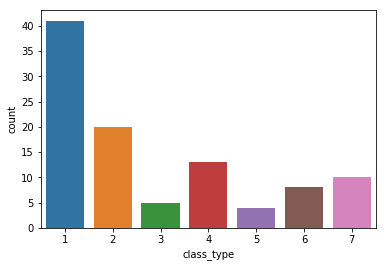

In [106]:
# Summary the animal type
sns.countplot(data['class_type'], label="Count")

Text(0.5,1.05,'Correlation of ZOO Features')

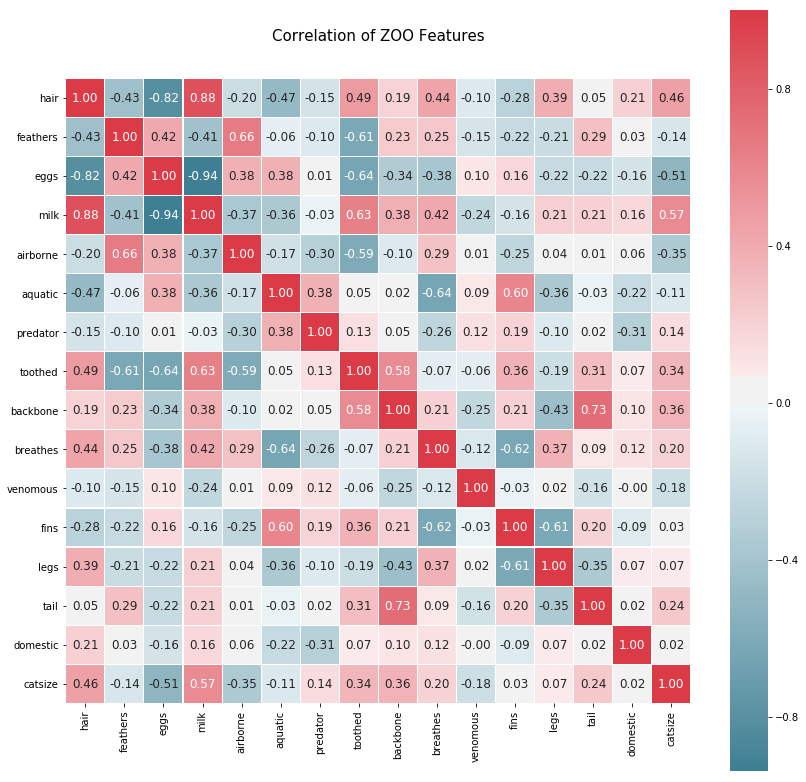

In [107]:
# Correlation Plot of 16 features

corr = data.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f',annot_kws={'size': 12},
            cmap=colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of ZOO Features', y=1.05, size=15)

In [108]:
def preprocess(data):
    X = data.iloc[:, 1:17]  # all rows, all the features and no labels
    y = data.iloc[:, 17]  # all rows, label only

    return X, y

In [109]:
# Shuffle and split the dataset
# We don't need to use this any more, thanks to scikit-learn!
'''
data = data.sample(frac=1).reset_index(drop=True)
data_total_len = data[data.columns[0]].size

data_train_frac = 0.9
split_index = math.floor(data_total_len*data_train_frac)

train_data = data.iloc[:split_index]
eval_data = data.iloc[split_index:]
'''

'\ndata = data.sample(frac=1).reset_index(drop=True)\ndata_total_len = data[data.columns[0]].size\n\ndata_train_frac = 0.9\nsplit_index = math.floor(data_total_len*data_train_frac)\n\ntrain_data = data.iloc[:split_index]\neval_data = data.iloc[split_index:]\n'

In [110]:
# Split the data using scikit-learn instead, using fewer lines!

from sklearn.model_selection import train_test_split

all_X, all_y = preprocess(data)
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y)

In [111]:
all_X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [112]:
all_y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [113]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


In [114]:
# Train and Evaluate the model

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
clf.score(X_test, y_test)

0.8461538461538461

In [116]:
# Predict on some new data
clf.predict(X_test[15:25])

array([3, 1, 1, 4, 1, 1, 1, 2, 4, 4], dtype=int64)

In [117]:
# Show what the correct answer is
y_test[10:15]

9     1
81    7
78    2
0     1
15    7
Name: class_type, dtype: int64

In [118]:
# Prepare Data for machine learning

# columns(features to predict class_type) for training. (eliminate class_type)
x_data = data.iloc[:,:-1]
x_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [119]:
# columns for comparing with predictions results. (need original class_type)
y_data = data.iloc[:,-1:]
y_data.head()

,class_type
0,1
1,1
2,4
3,1
4,1


In [120]:
print("Feature Data :", x_data.shape)
print("Label Data :", y_data.shape)

Feature Data : (101, 17)
Label Data : (101, 1)


In [121]:
# Divide "ZOO data" into Train(70%) / Test data(30%)

train_x, test_x, train_y, test_y = train_test_split(\
        x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)

print("Training Data has", train_x.shape)
print("Testing Data has", test_x.shape)

Training Data has (70, 17)
Testing Data has (31, 17)


In [122]:
# Drop animal_name column

train_name = train_x['animal_name']
test_name = test_x['animal_name']

train_x = train_x.iloc[:,1:]
test_x = test_x.iloc[:,1:]

print("Training Data has", train_x.shape)
print("Testing Data has", test_x.shape)

Training Data has (70, 16)
Testing Data has (31, 16)


In [123]:
# Make ANN-SLP Model

# Make "Placeholder" for dinamic variable allocation
#X = tf.placeholder(tf.float32, [None, 16]) 
#Y = tf.placeholder(tf.int32, [None, 1])

In [124]:
# One-Hot Encoding variable
#Y_one_hot = tf.one_hot(Y, 7)  # one hot encoding
#Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])

In [125]:
# Make Weight, Bias value with randomly
#W = tf.Variable(tf.random_normal([16, 7],seed=0), name='weight')
#b = tf.Variable(tf.random_normal([7],seed=0), name='bias')

In [126]:
# Make Output Results
#logits = tf.matmul(X, W) + b
# hypothesis = tf.nn.softmax(logits)

In [127]:
# Cross Entropy
#hypothesis = tf.nn.softmax(logits)

#cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
#cost = tf.reduce_mean(cost_i)
# cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis)))

In [128]:
# Gradient Descent Optimizer
#train  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)
# train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [129]:
# Compare : original vs. prediction
#prediction = tf.argmax(hypothesis, 1)
#correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [130]:
# Activate Model
'''
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)
'''

'\nwith tf.Session() as sess:\n    sess.run(tf.global_variables_initializer())\n    for step in range(5001):\n        sess.run(train, feed_dict={X: train_x, Y: train_y})\n        if step % 1000 == 0:\n            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})\n            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))\n            \n    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})\n    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})\n    print("Model Prediction =", train_acc)\n    print("Test Prediction =", test_acc)\n'

In [131]:
# Show Results
'''
sub = pd.DataFrame()
sub['Name'] = test_name
sub['Predict_Type'] = test_predict
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub
'''

"\nsub = pd.DataFrame()\nsub['Name'] = test_name\nsub['Predict_Type'] = test_predict\nsub['Origin_Type'] = test_y\nsub['Correct'] = test_correct\nsub\n"

In [132]:
# Submission
#sub[['Name','Predict_Type']].to_csv('zoo/submission-ann-slp.csv',index=False)

In [133]:
import numpy
from numpy import arange
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [134]:
# Evaluate Algorithm

# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

In [135]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [136]:
X_train, X_validation, Y_train, Y_validation = train_x, test_x, train_y, test_y

In [137]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.259757 (0.224049)
LASSO: -4.556008 (1.396626)
EN: -3.821057 (1.357764)
KNN: -0.423429 (0.273946)
CART: -0.157143 (0.216182)
SVR: -0.779915 (0.566476)


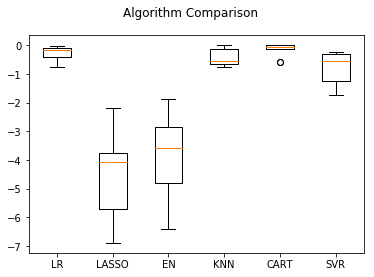

In [138]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [139]:
# Make predictions on validation dataset

# prepare the model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=1)
#model.fit(rescaledX, Y_train)
model.fit(X_train, Y_train)

# transform the validation dataset
#rescaledValidationX = scaler.transform(X_validation)
#predictions = model.predict(rescaledValidationX)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))

0.03225806451612903


In [140]:
all_X, all_y = preprocess(data)

predictions = model.predict(all_X)

predictions = predictions.astype(int)
predictions[:10]

array([[1],
       [1],
       [4],
       [1],
       [1],
       [1],
       [1],
       [4],
       [4],
       [1]])

In [141]:
all_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
hair        101 non-null int64
feathers    101 non-null int64
eggs        101 non-null int64
milk        101 non-null int64
airborne    101 non-null int64
aquatic     101 non-null int64
predator    101 non-null int64
toothed     101 non-null int64
backbone    101 non-null int64
breathes    101 non-null int64
venomous    101 non-null int64
fins        101 non-null int64
legs        101 non-null int64
tail        101 non-null int64
domestic    101 non-null int64
catsize     101 non-null int64
dtypes: int64(16)
memory usage: 12.7 KB


In [142]:
predictions = predictions.flatten()
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(101,)


In [143]:
submission = pd.DataFrame({
  "Name": data["animal_name"],
  "Actual Type": all_y,
  "Predicted Type": predictions,
  "Correctly Classified": (all_y == predictions)
})
submission.head(10)

,Name,Actual Type,Predicted Type,Correctly Classified
0,aardvark,1,1,True
1,antelope,1,1,True
2,bass,4,4,True
3,bear,1,1,True
4,boar,1,1,True
5,buffalo,1,1,True
6,calf,1,1,True
7,carp,4,4,True
8,catfish,4,4,True
9,cavy,1,1,True


In [144]:
submission[submission["Correctly Classified"] == False]

,Name,Actual Type,Predicted Type,Correctly Classified
76,seasnake,3,4,False


In [145]:
submission.to_csv("zoo/PredictedClasses.csv", index=False)